In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import f21_predict_base as base\n",
    "import plot_results as pltr
import importlib

importlib.reload(base)

def load_training_data(filename):
    import csv
    from collections import defaultdict

    # Dictionary to store grouped data
    grouped_data = defaultdict(list)

    # Load the CSV file
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Read the header

        # Identify the last two columns as keys
        key1_index = len(header) - 2
        key2_index = len(header) - 1

        # Read the data and group by the last two columns
        for i,row in enumerate(reader):
            key1 = float(row[key1_index])
            key2 = 5.0*(float(row[key2_index])-0.8)
            values = list(map(float, row[:-2]))  # Convert all but the last two columns to float
            if i==0: print(f"keys: {key1}:{key2}, values: {values}")
            grouped_data[(key1, key2)].append(values)

    # Calculate the mean for each group
    mean_data = {}
    for keys, values in grouped_data.items():
        mean_values = [sum(col) / len(col) for col in zip(*values)]
        mean_data[keys] = mean_values

    return mean_data

def print_sample(data):
    # Print the unique keys followed by the means
    for key, group in data.iterrows():
        if key[0] > 0.24 and key[0] < 0.26:
            print("Key:", key)
            print("Means:")
            print(group)
            print("---")

def initplt():
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18

def decide_alpha(num_ps):
    if num_ps >= 1000: return 0.01
    if num_ps <= 10: return 1
    logn = np.log10(num_ps)
    return 1 - (logn - 1) * 0.495

def filter_data(data, keyind, min, max):
    stats=[]
    params=[]

    for i,(k, v) in enumerate(zip(data.keys(),data.values())):
        print(f"key: {k}, values: {v}") # Debugging line
        if min <= k[keyind] <= max:
            print(f"Filtered key: {k}, values: {v}") # Debugging line
            stats.append(v)
            params.append(k)
    stats = np.array(stats)
    params = np.array(params)
    return stats, params


keys: 0.28555259108543396:-0.20000004768371604, values: [-46.051701859880914, -46.051701859880914, -19.506298507630653, -19.153656368239588, -19.194757847700433, -19.149951967465316, -19.268968076683706, -19.0974220985178, -19.151394651824532, -19.103961471477554, -19.033747982512594, -19.112476555032785, -19.101321377202414, -19.090220872793584, -19.114223342015585, -46.051701859880914, 0.9999901711940765, 0.003735004924237728, 0.07707208041101694, 0.27921566516160967, 1.7683692574501038, -0.23460738286375998]
dict_keys([(0.28555259108543396, -0.20000004768371604), (0.1896267533302307, -0.20000004768371604), (0.0034089593682438135, -0.20000004768371604), (0.04835174232721329, -0.20000004768371604), (0.2498556226491928, -0.20000004768371604), (0.09718798100948334, -0.20000004768371604), (0.15416058897972107, -0.20000004768371604), (0.3463872969150543, -0.20000004768371604), (0.39228907227516174, -0.20000004768371604), (0.5854173302650452, -0.20000004768371604), (0.6491464376449585, -0.

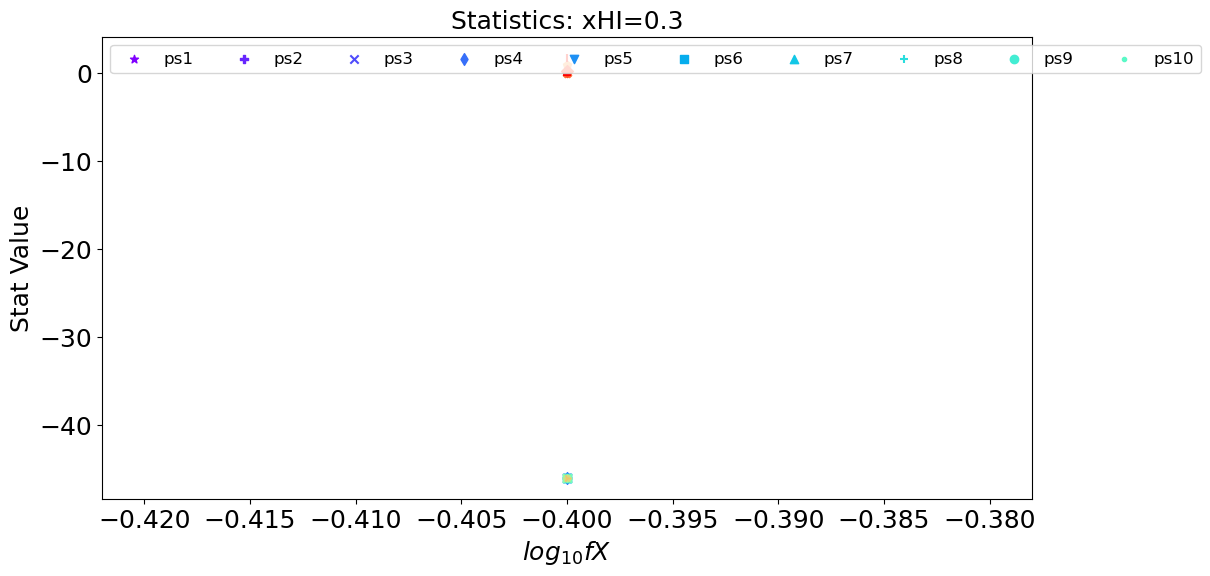

key: (0.28555259108543396, -0.20000004768371604), values: [-46.051701859880914, -46.051701859880914, -19.101684760917387, -19.113992885556062, -19.108731270186198, -19.13120439674885, -19.122874561665604, -19.094210084278316, -19.092090764677735, -19.104203631212336, -19.08029215358643, -19.078493471246876, -19.086336588626214, -19.082159372593267, -19.09032892889832, -46.051701859880914, 0.9999894922971725, 0.0037663977255579088, 0.07317878323621699, 0.2777205553650856, 1.7600914844870565, -0.2295123849157244]
key: (0.1896267533302307, -0.20000004768371604), values: [-46.051701859880914, -46.051701859880914, -19.233388995415147, -19.106903373218984, -19.031406360989187, -19.152065680214907, -19.104049306732158, -19.08959980108968, -19.060119763948997, -19.085253009079384, -19.084566892318463, -19.082750550998433, -19.095556705474763, -19.08577913845131, -19.08632490186911, -46.051701859880914, 1.000000978708267, 0.0037661740730982273, 0.07924281201780105, 0.2759404493123293, 1.7389198

<Figure size 1200x600 with 0 Axes>

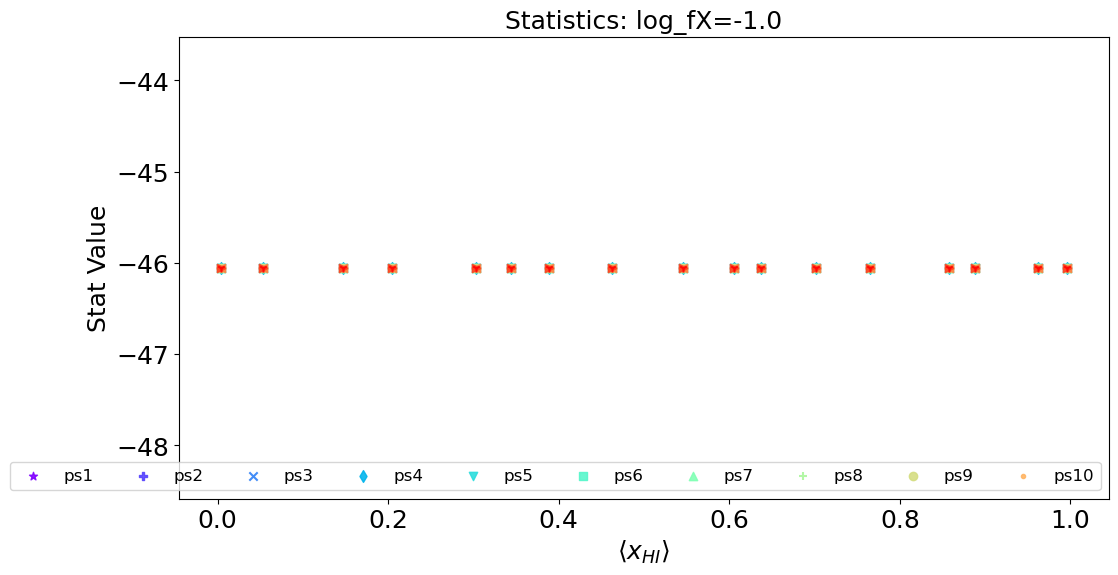

key: (0.28555259108543396, -0.20000004768371604), values: [-46.051701859880914, -46.051701859880914, -19.101684760917387, -19.113992885556062, -19.108731270186198, -19.13120439674885, -19.122874561665604, -19.094210084278316, -19.092090764677735, -19.104203631212336, -19.08029215358643, -19.078493471246876, -19.086336588626214, -19.082159372593267, -19.09032892889832, -46.051701859880914, 0.9999894922971725, 0.0037663977255579088, 0.07317878323621699, 0.2777205553650856, 1.7600914844870565, -0.2295123849157244]
key: (0.1896267533302307, -0.20000004768371604), values: [-46.051701859880914, -46.051701859880914, -19.233388995415147, -19.106903373218984, -19.031406360989187, -19.152065680214907, -19.104049306732158, -19.08959980108968, -19.060119763948997, -19.085253009079384, -19.084566892318463, -19.082750550998433, -19.095556705474763, -19.08577913845131, -19.08632490186911, -46.051701859880914, 1.000000978708267, 0.0037661740730982273, 0.07924281201780105, 0.2759404493123293, 1.7389198

<Figure size 1200x600 with 0 Axes>

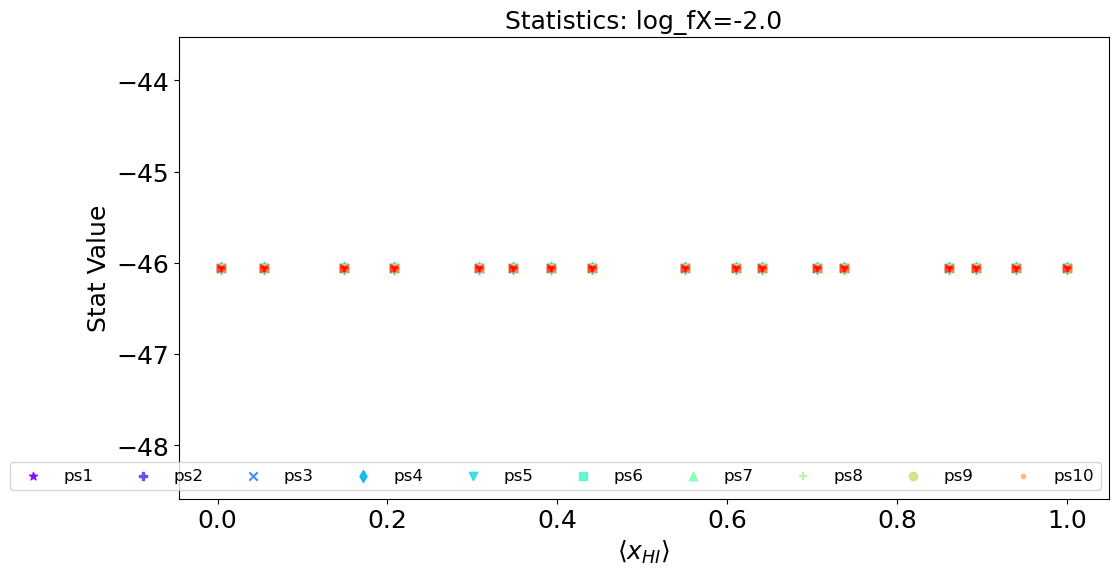

<Figure size 1200x600 with 0 Axes>

In [48]:
# Load the data and compute means
#data = load_training_data('output/f21_ps_xgb_train_test_uGMRT_t500h_b1_20241226082614/all_training_data.csv')
data = load_training_data('output/f21_ps_xgb_train_test_uGMRT_t500h_b1_20241226112817/all_training_data.csv')
print(data.keys())
print(data.values())
# Get filtered data for xHI=0.25
stats, params = filter_data(data, 0, 0.29, 0.31)
print(stats.shape)
print(params.shape)
print(stats[18])
print(params[18])
base.plot_stats(stats[:1], params[:1], colorind=1, statind=2, saveplots=False, showplots=True, label='xHI=0.3')

stats, params = filter_data(data, 1, -1.1, -0.9)
base.plot_stats(stats[:,3:16], params, colorind=0, statind=2, saveplots=False, showplots=True, label='log_fX=-1.0')

stats, params = filter_data(data, 1, -2.1, -1.9)
base.plot_stats(stats[:,3:16], params, colorind=0, statind=2, saveplots=False, showplots=True, label='log_fX=-2.0')


min-max range: -3.0000000596046448--3.0000000596046448


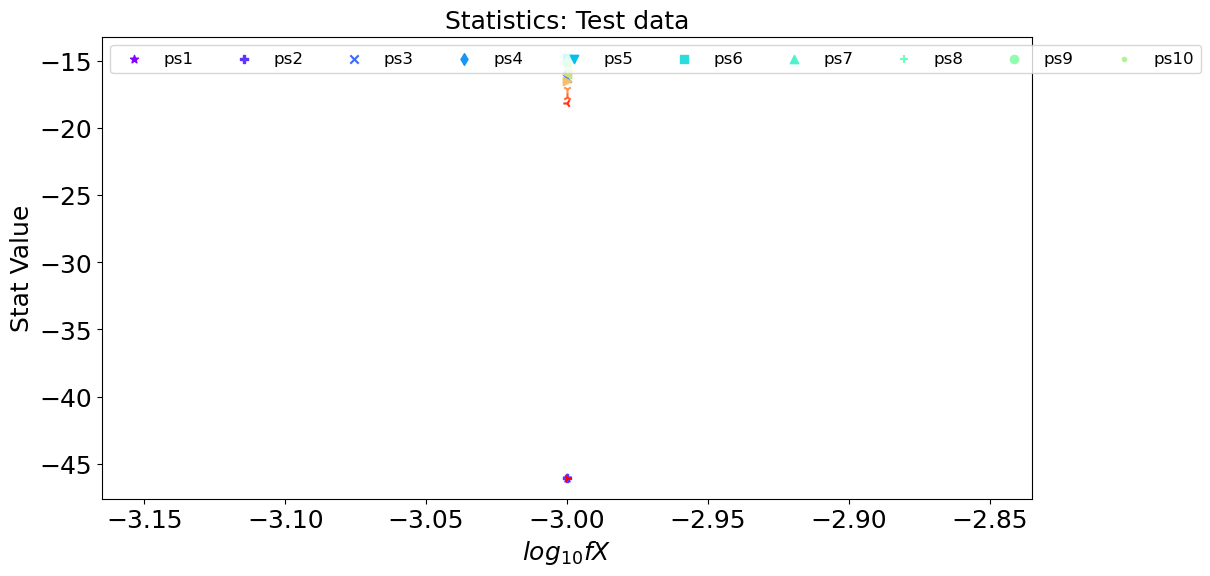

<Figure size 1200x600 with 0 Axes>

In [24]:
# Load the data and compute means
data = load_training_data('output/f21_ps_xgb_train_test_uGMRT_t500h_b1_20241226112817/all_test_data.csv')
# Get filtered data for xHI=0.25
stats, params = filter_data(data, 0, 0.0, 1.0)
base.plot_stats(stats[:,:16], params, colorind=1, statind=2, saveplots=False, showplots=True, label='Test data')
